In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [46]:
def haversine(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, radius=6371):
    phi1, phi2 = np.radians(pickup_latitude), np.radians(dropoff_latitude)
    delta_phi = phi2 - phi1
    delta_lambda = np.radians(dropoff_longitude) - np.radians(pickup_longitude)
    a = (np.sin(delta_phi / 2))**2 + np.cos(phi1) * np.cos(phi2) * (np.sin(delta_lambda / 2))**2
    return 2 * radius * np.arcsin(np.sqrt(a))

In [47]:
haversine(-73.844311, 40.721319, -73.841610, 40.712278)

1.030763935049508

In [50]:
%time
df['distance'] = pd.Series(haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']) for i, row in df.iterrows())

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs


In [51]:
%time
dists = [ ]
for i, row in df.iterrows():
    dists.append(haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']))
df['distance'] = dists

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


In [57]:
for row in df[:3].itertuples(name='custom_name'):
    print(row)

custom_name(Index=0, key='2009-06-15 17:26:21.0000001', fare_amount=4.5, pickup_datetime='2009-06-15 17:26:21 UTC', pickup_longitude=-73.844311, pickup_latitude=40.721319, dropoff_longitude=-73.84161, dropoff_latitude=40.71227800000001, passenger_count=1, distance=1.0307639350481281)
custom_name(Index=1, key='2010-01-05 16:52:16.0000002', fare_amount=16.9, pickup_datetime='2010-01-05 16:52:16 UTC', pickup_longitude=-74.016048, pickup_latitude=40.711303, dropoff_longitude=-73.979268, dropoff_latitude=40.782004, passenger_count=1, distance=8.450133595805992)
custom_name(Index=2, key='2011-08-18 00:35:00.00000049', fare_amount=5.7, pickup_datetime='2011-08-18 00:35:00 UTC', pickup_longitude=-73.982738, pickup_latitude=40.76127, dropoff_longitude=-73.991242, dropoff_latitude=40.750562, passenger_count=2, distance=1.3895252257697308)


In [60]:
%time
dists = [ ]
for row in df.itertuples():
    dists.append(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude))
df['distance'] = dists    

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.2 µs


In [61]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [64]:
%time
df['distance'] = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.9 µs


In [65]:
longest = df.distance.max()

In [66]:
longest

8667.818812217458

In [67]:
%time
df['distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.2 µs


In [68]:
df[(df['dropoff_longitude']==0) | (df['dropoff_latitude']==0)].shape[0]

958

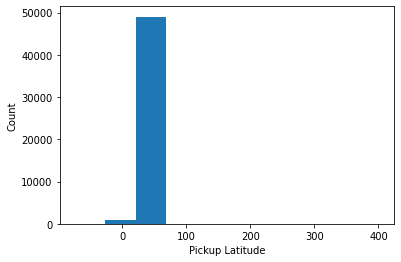

In [78]:
plt.hist(df['pickup_latitude'], bins=10)
plt.xlabel('Pickup Latitude')
plt.ylabel('Count')
plt.show()

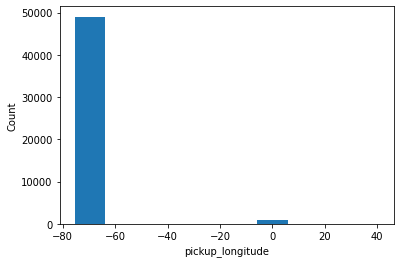

In [79]:
plt.hist(df['pickup_longitude'], bins=10)
plt.xlabel('pickup_longitude')
plt.ylabel('Count')
plt.show()

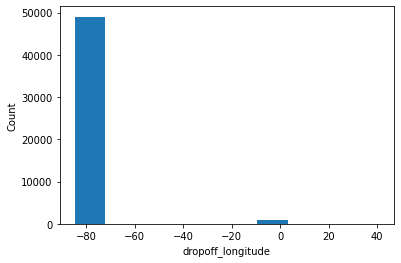

In [80]:
plt.hist(df['dropoff_longitude'], bins=10)
plt.xlabel('dropoff_longitude')
plt.ylabel('Count')
plt.show()

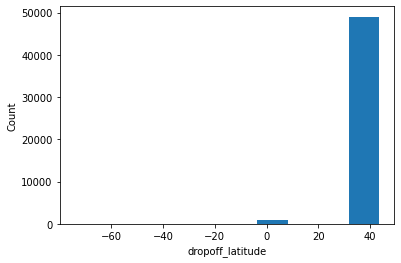

In [81]:
plt.hist(df['dropoff_latitude'], bins=10)
plt.xlabel('dropoff_latitude')
plt.ylabel('Count')
plt.show()

In [92]:
df.query('10 < pickup_latitude < 120 and pickup_longitude < -60 and 10 < dropoff_latitude and dropoff_longitude < -60 and distance < 50').sort_values('distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.00,2014-02-22 02:44:00 UTC,-73.989540,40.757032,-73.860580,41.147487,1,44.746988
12349,2010-05-01 15:23:00.00000097,104.67,2010-05-01 15:23:00 UTC,-73.797225,40.639720,-73.840545,41.030892,1,43.648755
649,2009-09-19 10:34:41.0000002,66.30,2009-09-19 10:34:41 UTC,-74.438233,40.993260,-74.185996,40.693874,2,39.476975
6308,2010-08-23 11:06:00.000000121,45.00,2010-08-23 11:06:00 UTC,-73.422692,40.747012,-73.870317,40.773160,1,37.812945
18656,2009-12-08 12:58:00.00000033,49.57,2009-12-08 12:58:00 UTC,-73.781842,40.644690,-74.177562,40.695237,5,33.844445
...,...,...,...,...,...,...,...,...,...
31060,2010-10-14 19:33:00.000000253,4.90,2010-10-14 19:33:00 UTC,-73.982855,40.735333,-73.982855,40.735333,1,0.000000
31041,2012-11-30 13:46:02.0000004,11.50,2012-11-30 13:46:02 UTC,-73.983847,40.738317,-73.983847,40.738317,1,0.000000
31024,2010-11-28 02:45:00.000000134,14.50,2010-11-28 02:45:00 UTC,-73.896035,40.761718,-73.896035,40.761718,5,0.000000
30923,2011-11-09 20:39:08.0000001,60.50,2011-11-09 20:39:08 UTC,-74.036185,40.742231,-74.036185,40.742231,1,0.000000


In [89]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance'],
      dtype='object')